In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from bayes_opt import BayesianOptimization
from Environment import environment, environment_array

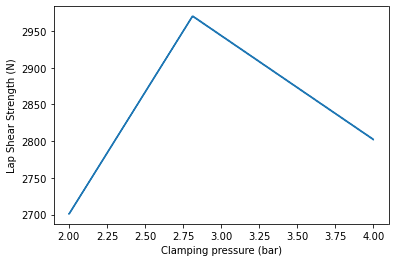

In [2]:
data = []

g = []
h = []
j = []


cvalues=np.linspace(2, 4, 10000)
avalues = np.linspace(1000,4000,len(cvalues))
bvalues=np.linspace(40, 65, len(cvalues))
cdata=np.linspace(2, 4, len(cvalues))
bdata=np.linspace(40, 65, len(cvalues))

for i in range(len(bdata)):
    avalues[i] = (bvalues[i]-1000)/2500
    bvalues[i] = (bvalues[i] - 45) / 20
    cvalues[i] = (cvalues[i] - 2) / 2

    g.append(avalues[i])
    h.append(bvalues[i])
    j.append(cvalues[i])

    func=environment(j[i])
    data.append(float(func))
    data=list(data)
plt.ylabel('Lap Shear Strength (N)')
plt.xlabel('Clamping pressure (bar)')
data=np.round(data)
plt.plot(cdata,data)
plt.show()

In [3]:

np.random.seed(42)
xs = np.linspace(2, 4, 100)

#def f(xs):
    #return environment_array(xs)
def f(xs):
    return xs**2
print(f(xs))



[ 4.          4.0812162   4.16324865  4.24609734  4.32976227  4.41424344
  4.49954086  4.58565453  4.67258443  4.76033058  4.84889297  4.9382716
  5.02846648  5.1194776   5.21130497  5.30394858  5.39740843  5.49168452
  5.58677686  5.68268544  5.77941026  5.87695133  5.97530864  6.0744822
  6.17447199  6.27527803  6.37690032  6.47933884  6.58259361  6.68666463
  6.79155188  6.89725538  7.00377512  7.11111111  7.21926334  7.32823181
  7.43801653  7.54861749  7.66003469  7.77226814  7.88531782  7.99918376
  8.11386593  8.22936435  8.34567901  8.46280992  8.58075707  8.69952046
  8.81910009  8.93949597  9.06070809  9.18273646  9.30558106  9.42924191
  9.55371901  9.67901235  9.80512193  9.93204775 10.05978982 10.18834813
 10.31772268 10.44791348 10.57892052 10.7107438  10.84338333 10.9768391
 11.11111111 11.24619937 11.38210387 11.51882461 11.6563616  11.79471483
 11.9338843  12.07387001 12.21467197 12.35629017 12.49872462 12.64197531
 12.78604224 12.93092542 13.07662483 13.2231405  13.37

In [4]:

def plot_bo(f, bo):
    x = np.linspace(-2, 10, 10000)
    mean, sigma = bo._gp.predict(x.reshape(-1, 1), return_std=True)
    
    plt.figure(figsize=(16, 9))
    plt.plot(x, f(x))
    plt.plot(x, mean)
    plt.fill_between(x, mean + sigma, mean - sigma, alpha=0.1)
    plt.scatter(bo.space.params.flatten(), bo.space.target, c="red", s=50, zorder=10)
    plt.show()

# Prefer exploitation kappa = 1

# Prefer exploration (kappa = 10)

In [5]:

bo = BayesianOptimization(
    f=f,
    pbounds={"x": (-2, 10)},
    verbose=0,
    random_state=987234,
)

bo.maximize(n_iter=10, acq="ucb", kappa=10)

plot_bo(f, bo)

TypeError: f() got an unexpected keyword argument 'x'

# Acquisition Function "Expected Improvement"

# Prefer exploitation (xi=0)